In [466]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.base import BaseEstimator, TransformerMixin

In [467]:
def read_dataset(fname, x_cols=['f1', 'f2'], y_col='class', train_size=0.8):
    dataset = pd.read_csv(fname, header=None, names=x_cols + [y_col])
    train, test = train_test_split(dataset, train_size=train_size)
    train_x, train_y = train[x_cols], train[y_col]
    test_x, test_y = test[x_cols], test[y_col]
    return train, train_x, train_y, test, test_x, test_y

fname1 = 'logistic_regression_dataset_1.txt'
train1, train_x1, train_y1, test1, test_x1, test_y1 = read_dataset(fname1)

In [484]:
def dataset_details(dataset):
    display(dataset)
    display(dataset.describe())
    display(dataset.corr())
    display(dataset.dtypes)
    sns.scatterplot(x="f1", y="f2", data=dataset, hue="class")

f1         f2  class
84  80.366756  90.960148      1
68  80.279574  92.116061      1
61  35.286113  47.020514      0
75  99.827858  72.369252      1
11  75.013658  30.603263      0
..        ...        ...    ...
2   35.847409  72.902198      0
31  85.404519  57.051984      1
62  56.253817  39.261473      0
27  93.114389  38.800670      0
56  97.645634  68.861573      1

[80 rows x 3 columns]

f1         f2      class
count  80.000000  80.000000  80.000000
mean   64.001991  66.235425   0.562500
std    18.808986  19.671141   0.499208
min    30.286711  30.603263   0.000000
25%    50.515631  46.811861   0.000000
50%    65.368942  67.725463   1.000000
75%    77.215111  85.635714   1.000000
max    99.827858  98.869436   1.000000

f1        f2     class
f1     1.000000 -0.035244  0.507683
f2    -0.035244  1.000000  0.574092
class  0.507683  0.574092  1.000000

f1       float64
f2       float64
class      int64
dtype: object

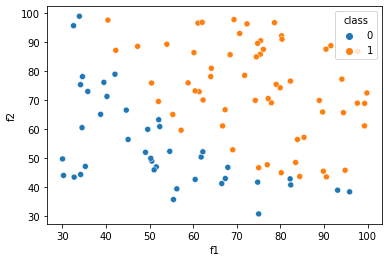

In [469]:
dataset_details(train1)

Train accuracy: 0.875


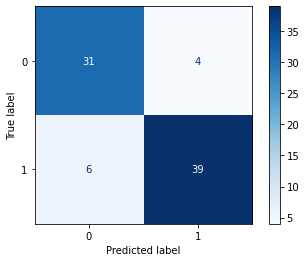

Test accuracy: 0.95


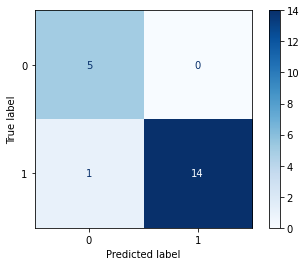

In [470]:
def train_log_reg(x, y, transformer=None, with_mean_normalization=True, with_std_normalization=True, 
                  regularizaion='none', alpha=1, max_iter=999999, 
                  learning_rate_algo='constant', learning_rate=0.01):
    steps = [transformer] if transformer else []
    steps.append(StandardScaler(with_mean=with_mean_normalization, with_std=with_std_normalization))
    steps.append(SGDClassifier(loss='log', penalty=regularizaion, alpha=alpha, max_iter=max_iter,
                                     learning_rate=learning_rate_algo, eta0=learning_rate,
                                     shuffle=False))
    
    clf = make_pipeline(*steps)
    return clf.fit(x, y)

def plot_classifier_results(classifier, name, x, y):
    print('{name} accuracy: {acc}'.format(name=name, acc=classifier.score(x, y)))
    plot_confusion_matrix(classifier, x, y, cmap=plt.cm.Blues)
    plt.show()

def train_and_test(train_x, train_y, test_x, test_y, with_mean_normalization=True, with_std_normalization=True, 
                  regularizaion=None, alpha=1, max_iter=999999, learning_rate_algo='constant', learning_rate=0.01):
    classifier = train_log_reg(train_x, train_y)
    plot_classifier_results(classifier, 'Train', train_x, train_y)
    plot_classifier_results(classifier, 'Test', test_x, test_y)

train_and_test(train_x1, train_y1, test_x1, test_y1)

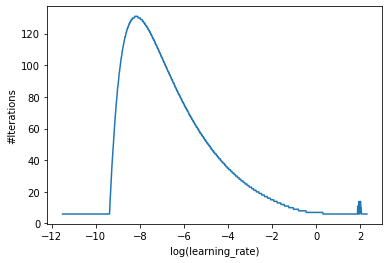

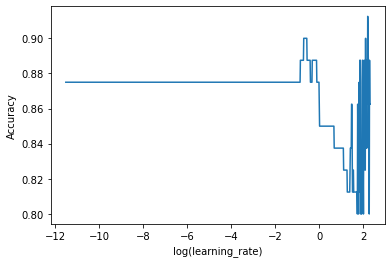

In [471]:
def plot_learning_rate_convergence_graph(train_x, train_y, first_num=-5, last_num=1):
    learning_rates = np.logspace(first_num, last_num, num=1000, base=10)
    n_iters = []
    accuracies = []
    for learning_rate in learning_rates:
        classifier = train_log_reg(train_x, train_y, learning_rate=learning_rate, learning_rate_algo='constant')
        n_iters.append(classifier.named_steps['sgdclassifier'].n_iter_)
        accuracies.append(classifier.score(train_x, train_y))
        
    x_values = np.log(learning_rates)
    x_label = 'log(learning_rate)'
    
    plt.plot(x_values, n_iters)
    plt.xlabel(x_label)
    plt.ylabel('#Iterations')
    plt.show()
    
    plt.plot(x_values, accuracies)
    plt.xlabel(x_label)
    plt.ylabel('Accuracy')
    plt.show()
    
plot_learning_rate_convergence_graph(train_x1, train_y1)

In [506]:
class DatasetTransfomer1(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    
    def transform(self, x, y=None):
        trans_x = x.copy()
        #trans_x['square_f1'] = trans_x['f1'] * trans_x['f1']
        #trans_x['square_f2'] = trans_x['f2'] * trans_x['f2']
        trans_x['mul'] = trans_x['f1'] * trans_x['f2']
        #trans_x['add'] = trans_x['f1'] + trans_x['f2']
        trans_x = trans_x.drop(columns=['f1', 'f2'])
        return trans_x

def print_train_vs_test_results(train_x, train_y, test_x, test_y, transformer_class=None):
    transformer = transformer_class() if transformer_class else None
    classifier = train_log_reg(train_x, train_y, transformer=transformer, 
                               learning_rate_algo='optimal')
    print('Train: ', classifier.score(train_x, train_y))
    print('Test: ', classifier.score(test_x, test_y))
    
def trans_experiment_results(train_x, train_y, test_x, test_y, transformer_class):
    print('Before Transformation...')
    print_train_vs_test_results(train_x, train_y, test_x, test_y)
    print('*******************')
    print('After Transformation...')
    print_train_vs_test_results(train_x, train_y, test_x, test_y, transformer_class=transformer_class)
    
trans_experiment_results(train_x1, train_y1, test_x1, test_y1, transformer_class=DatasetTransfomer1)

Before Transformation...
Train:  0.875
Test:  0.95
*******************
After Transformation...
Train:  0.9125
Test:  0.9


In [477]:
regulazied_classifier = train_log_reg(train_x1, train_y1, learning_rate_algo='optimal', regularizaion='l2')
print('Train: ', regulazied_classifier.score(train_x1, train_y1))
print('Test: ', regulazied_classifier.score(test_x1, test_y1))

Train:  0.775
Test:  0.85


In [481]:
fname2 = 'logistic_regression_dataset_2.txt'
train2, train_x2, train_y2, test2, test_x2, test_y2 = read_dataset(fname2)

f1        f2  class
17  -0.046659  0.816520      1
90  -0.507490  0.904240      0
91  -0.547810  0.706870      0
64   0.765550  0.502190      0
41   0.483290 -0.184940      1
..        ...       ...    ...
25   0.201040 -0.601610      1
42   0.644590 -0.141080      1
117  0.632650 -0.030612      0
2   -0.213710  0.692250      1
46   0.725230  0.443710      1

[94 rows x 3 columns]

f1         f2      class
count  94.000000  94.000000  94.000000
mean    0.057084   0.175820   0.521277
std     0.481368   0.523254   0.502226
min    -0.830070  -0.769740   0.000000
25%    -0.298677  -0.265350   0.000000
50%    -0.026498   0.242690   1.000000
75%     0.500578   0.646563   1.000000
max     0.926840   1.108900   1.000000

f1        f2     class
f1     1.000000 -0.183550 -0.048291
f2    -0.183550  1.000000 -0.001572
class -0.048291 -0.001572  1.000000

f1       float64
f2       float64
class      int64
dtype: object

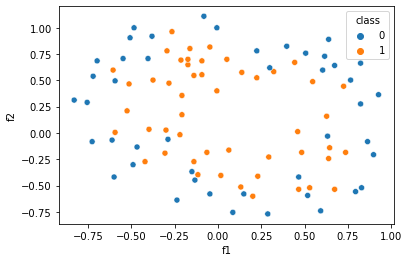

In [485]:
dataset_details(train2)

In [520]:
class DatasetTransfomer2(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    
    def transform(self, x, y=None):
        trans_x = x.copy()
        trans_x['square_f1'] = trans_x['f1'] * trans_x['f1']
        trans_x['square_f2'] = trans_x['f2'] * trans_x['f2']
        #trans_x['triple_f1'] = trans_x['f1'] * trans_x['f1'] * trans_x['f1']
        #trans_x['triple_f2'] = trans_x['f2'] * trans_x['f2'] * trans_x['f2']
        #trans_x['mul'] = trans_x['f1'] * trans_x['f2']
        #trans_x['add'] = trans_x['f1'] + trans_x['f2']
        trans_x = trans_x.drop(columns=['f1', 'f2'])
        return trans_x
    
trans_experiment_results(train_x2, train_y2, test_x2, test_y2, transformer_class=DatasetTransfomer2)

Before Transformation...
Train:  0.5
Test:  0.5
*******************
After Transformation...
Train:  0.723404255319149
Test:  0.75


In [521]:
regulazied_classifier = train_log_reg(train_x2, train_y2, learning_rate_algo='optimal', regularizaion='l2',
                                     transformer=DatasetTransfomer2())
print('Train: ', regulazied_classifier.score(train_x2, train_y2))
print('Test: ', regulazied_classifier.score(test_x2, test_y2))

Train:  0.723404255319149
Test:  0.75


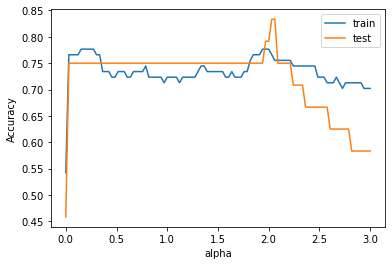

Best test accuracy:  0.8333333333333334
Best alpha:  2.0303062626262625


In [541]:
def search_best_regulized_model(train_x, train_y, test_x, test_y):
    alphas = np.linspace(10 ** -5, 3, num=100)
    train_accuracies = []
    test_accuracies = []
    for alpha in alphas:
        classifier = train_log_reg(train_x, train_y, learning_rate_algo='optimal', 
                                   regularizaion='l2', alpha=alpha,
                                   transformer=DatasetTransfomer2())
        train_accuracies.append(classifier.score(train_x, train_y))
        test_accuracies.append(classifier.score(test_x, test_y))
    
    plt.plot(alphas, train_accuracies, label='train')
    plt.plot(alphas, test_accuracies, label='test')
    plt.xlabel('alpha')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    max_test_accuracy_index = np.argmax(np.array(test_accuracies))
    print('Best test accuracy: ', test_accuracies[max_test_accuracy_index])
    print('Best alpha: ', alphas[max_test_accuracy_index])
    
search_best_regulized_model(train_x2, train_y2, test_x2, test_y2)

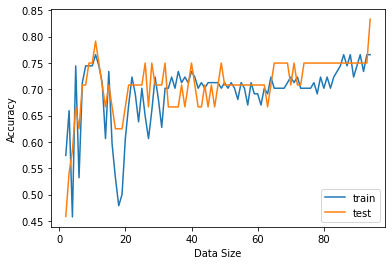

In [555]:
def plot_data_size_effect_on_accuracy(train_x, train_y, test_x, test_y):
    train_accuracies = []
    test_accuracies = []
    data_sizes = range(2, train_x.shape[0] + 1)
    for i in data_sizes:
        classifier = train_log_reg(train_x.head(i), train_y.head(i), learning_rate_algo='optimal', 
                                   regularizaion='l2', alpha=2.03,
                                   transformer=DatasetTransfomer2())
        train_accuracies.append(classifier.score(train_x, train_y))
        test_accuracies.append(classifier.score(test_x, test_y))
    
    plt.plot(data_sizes, train_accuracies, label='train')
    plt.plot(data_sizes, test_accuracies, label='test')
    plt.xlabel('Data Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_data_size_effect_on_accuracy(train_x2, train_y2, test_x2, test_y2)